In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [192]:
from sklearn.metrics import  accuracy_score,r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
def acc_score(y_pred,y_true,show_res=True):

    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

def feature_plot(imp_features,X):
    indices = np.argsort(imp_features)[::-1]
    num_features=len(imp_features[imp_features>0])
    columns = X.columns.values[indices][:num_features]
    values=imp_features[indices][:num_features]

    plt.figure(figsize = (15,5))
    plt.title("Feature importances")
    plt.barh(range(num_features), values, align="center")
    plt.yticks(range(num_features), columns)
    plt.ylim([ num_features,-1])
    plt.show() 
    
def plot_test_data(y_test,y_pred):
    pred_data=y_test.copy()
    pred_data=pred_data.to_frame()
    pred_data['pred']=y_pred
    pred_data.plot(kind='line',use_index=False)
    pred_data.plot(kind='bar',use_index=True)
    plt.show();
    display(pred_data)
    
def get_reg_results(X_train,y_train,X_test,y_test,clf_models,print_var_imp):
    imp_features=None
    for clf in clf_models:
        model_name=clf.__class__.__name__
        print('**Model name: ',model_name)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        
        clf_metrics=acc_score(y_test,pred)
        plot_test_data(y_test,pred)
        if print_var_imp:
            try:
                imp_features=clf.feature_importances_
                feature_plot(imp_features,X_train)  
            except AttributeError:
                pass
    return imp_features

In [4]:
raw_data=pd.read_excel('dataset.xlsx',sheet_name='data')
raw_data.head(3)

,User,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,Var 9,...,Var 72,Var 73,Var 74,Var 75,Var 76,Var 77,Var 78,Var 79,Var 80,LAB BG VAL
0,NaN,272.0,257.0,238.0,225.0,250.0,246.0,241.0,340.0,322.0,...,345.0,345.0,345.0,346.0,345.0,345.0,345.0,345.0,346.0,82.0
1,1.0,115.0,142.0,104.0,107.0,99.0,124.0,121.0,171.0,154.0,...,170.0,171.0,169.0,170.0,170.0,170.0,171.0,169.0,170.0,75.0
2,2.0,329.0,339.0,321.0,384.0,357.0,316.0,336.0,444.0,444.0,...,448.0,449.0,449.0,449.0,449.0,450.0,449.0,448.0,449.0,163.0


In [190]:
from sklearn.model_selection import train_test_split
#raw_data=data.copy()
raw_data.dropna(inplace=True)
#raw_data=scale_numerical_data(raw_data)
X,y=raw_data.drop(['LAB BG VAL','User'],axis=1),raw_data['LAB BG VAL']
#X=scale_numerical_data(X)
random_state=42

In [270]:
summary_data=pd.DataFrame()
#summary_data['max']=X.max(axis=1)
summary_data['min']=X.min(axis=1)
summary_data['avg']=X.mean(axis=1)
summary_data['std']=X.std(axis=1)
summary_data['mode']=X.mode(axis=1)[0]
#summary_data['median']=X.median(axis=1)
summary_data['max-min']=X.max(axis=1)-X.min(axis=1)
x_train,x_test,y_train,y_test=train_test_split(summary_data,y,test_size=0.1,random_state=random_state)
summary_data.head(3)

,min,avg,std,mode,max-min
1,99.0,164.2375,15.724080,169.0,72.0
2,316.0,436.6625,32.268236,449.0,134.0
3,235.0,330.4625,24.282068,335.0,153.0


**Model name:  LinearRegression
 ERROR MEASURES 
Root Mean Squared Error:  47.93430190656979
Mean Absolute Error:  41.10327578430039
Mean Absolute Percent Error:  23.706701899627486
R2 score:  -3.670006229767849


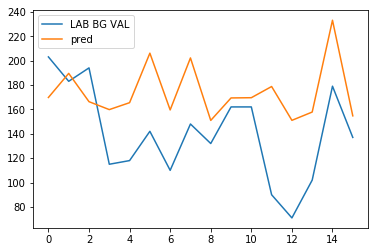

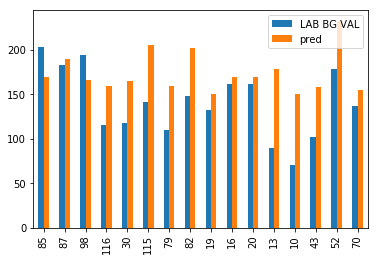

,LAB BG VAL,pred
85,203.0,169.750831
87,183.0,189.501525
98,194.0,166.301803
116,115.0,159.803075
30,118.0,165.481335
115,142.0,206.075770
79,110.0,159.528799
82,148.0,202.171406
19,132.0,150.940217
16,162.0,169.363723


**Model name:  RandomForestRegressor
 ERROR MEASURES 
Root Mean Squared Error:  53.44504771258044
Mean Absolute Error:  38.89375
Mean Absolute Percent Error:  21.570539746067066
R2 score:  -0.27515663373648036


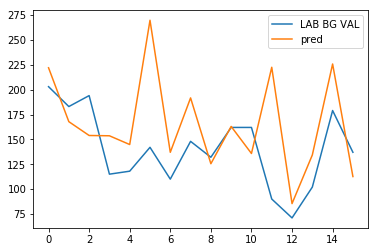

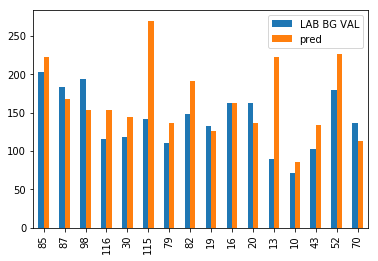

,LAB BG VAL,pred
85,203.0,222.0
87,183.0,167.8
98,194.0,153.9
116,115.0,153.6
30,118.0,144.8
115,142.0,269.8
79,110.0,137.0
82,148.0,191.7
19,132.0,125.5
16,162.0,163.0


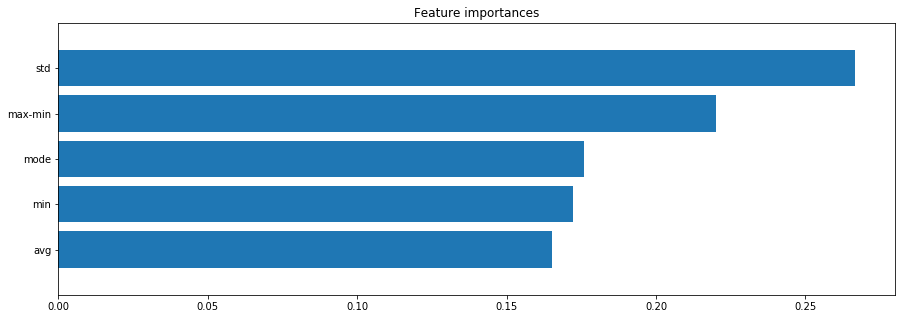

**Model name:  GradientBoostingRegressor
 ERROR MEASURES 
Root Mean Squared Error:  55.6312161171685
Mean Absolute Error:  42.769242051178225
Mean Absolute Percent Error:  25.217387248626622
R2 score:  -0.3547731455229006


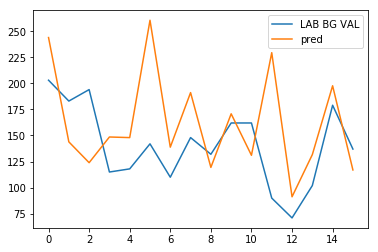

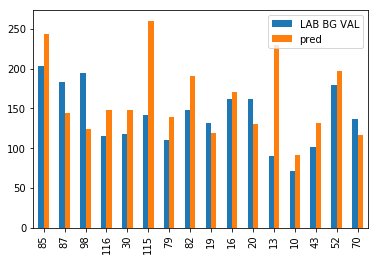

,LAB BG VAL,pred
85,203.0,243.881877
87,183.0,143.906203
98,194.0,123.944464
116,115.0,148.565206
30,118.0,147.989535
115,142.0,260.469632
79,110.0,138.822399
82,148.0,191.115224
19,132.0,119.423380
16,162.0,170.789328


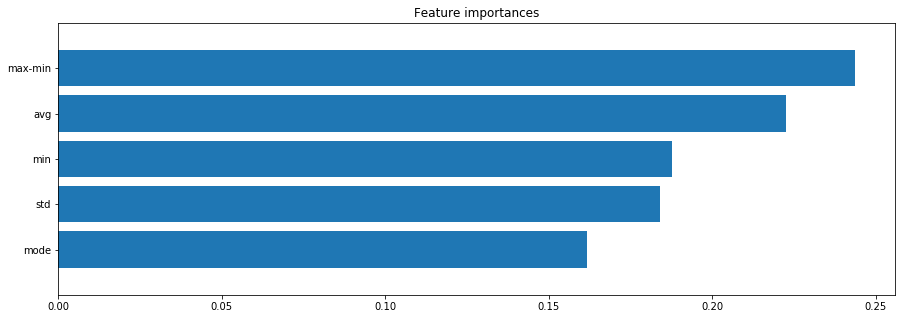

**Model name:  SGDRegressor
 ERROR MEASURES 
Root Mean Squared Error:  1352188034223154.5
Mean Absolute Error:  1141716732150493.2
Mean Absolute Percent Error:  99.99999999998244
R2 score:  -2.483384570787404


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


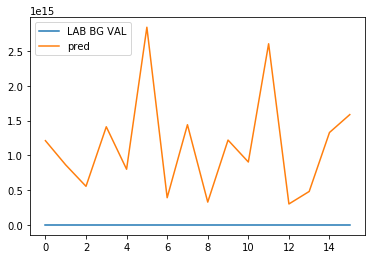

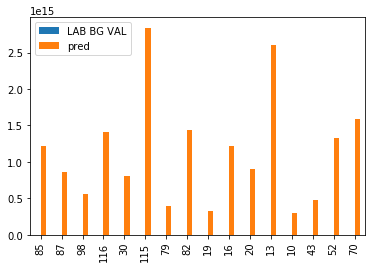

,LAB BG VAL,pred
85,203.0,1.211190e+15
87,183.0,8.627256e+14
98,194.0,5.548485e+14
116,115.0,1.410895e+15
30,118.0,8.004405e+14
115,142.0,2.841922e+15
79,110.0,3.911120e+14
82,148.0,1.440492e+15
19,132.0,3.281264e+14
16,162.0,1.219876e+15


**Model name:  KNeighborsRegressor
 ERROR MEASURES 
Root Mean Squared Error:  48.271653172436515
Mean Absolute Error:  37.3125
Mean Absolute Percent Error:  22.032090541736938
R2 score:  -1.3943329693581723


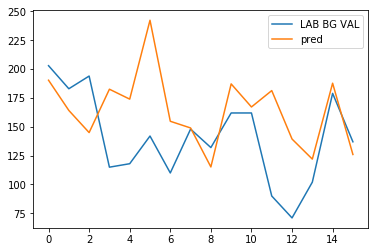

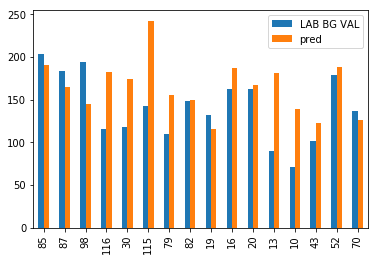

,LAB BG VAL,pred
85,203.0,190.4
87,183.0,164.2
98,194.0,145.0
116,115.0,182.6
30,118.0,174.0
115,142.0,242.4
79,110.0,154.8
82,148.0,149.0
19,132.0,115.2
16,162.0,187.2


**Model name:  AdaBoostRegressor
 ERROR MEASURES 
Root Mean Squared Error:  63.738552624371316
Mean Absolute Error:  50.41670610687778
Mean Absolute Percent Error:  26.331039812488893
R2 score:  -3.7993725098688245


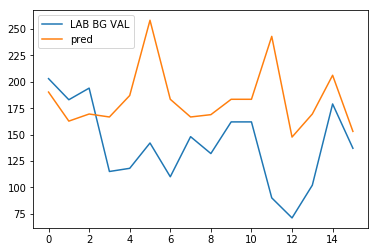

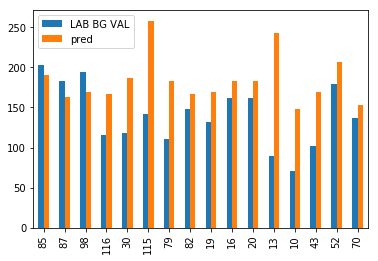

,LAB BG VAL,pred
85,203.0,190.266667
87,183.0,162.738095
98,194.0,169.475000
116,115.0,166.657143
30,118.0,187.000000
115,142.0,258.338983
79,110.0,183.426471
82,148.0,166.657143
19,132.0,168.861111
16,162.0,183.426471


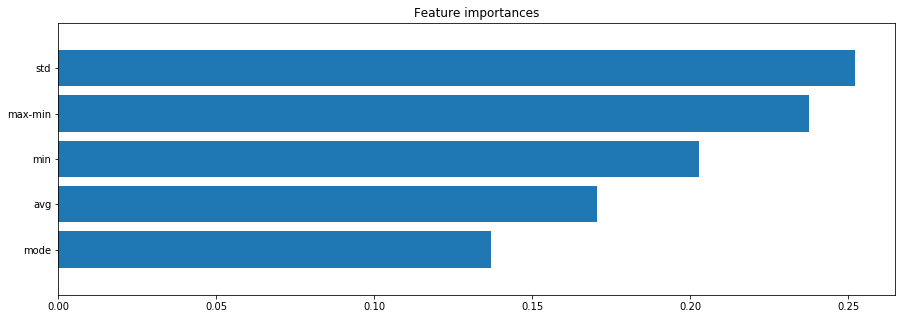

**Model name:  MLPRegressor
 ERROR MEASURES 
Root Mean Squared Error:  68.84901182897146
Mean Absolute Error:  56.447016376129355
Mean Absolute Percent Error:  70.80873203830836
R2 score:  -0.17036080981722912


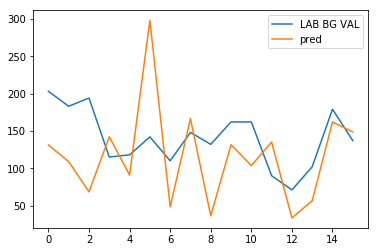

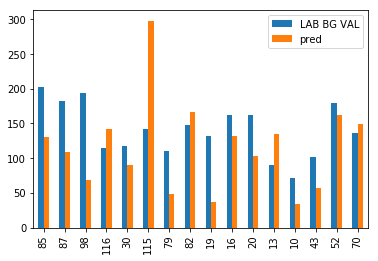

,LAB BG VAL,pred
85,203.0,131.147262
87,183.0,108.862377
98,194.0,68.435561
116,115.0,142.147010
30,118.0,90.924052
115,142.0,298.168712
79,110.0,48.158067
82,148.0,166.468719
19,132.0,36.414429
16,162.0,131.569714


array([0.20285988, 0.1703752 , 0.25227418, 0.13706604, 0.23742471])

In [271]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]   
get_reg_results(x_train,y_train,x_test,y_test,clf_models,True)

## Linear Coefficient 

 ERROR MEASURES 
Root Mean Squared Error:  47.93430190656979
Mean Absolute Error:  41.10327578430039
Mean Absolute Percent Error:  23.706701899627486
R2 score:  -3.670006229767849


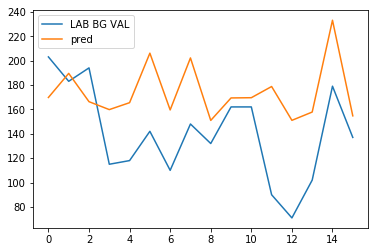

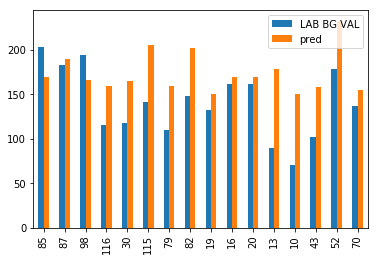

,LAB BG VAL,pred
85,203.0,169.750831
87,183.0,189.501525
98,194.0,166.301803
116,115.0,159.803075
30,118.0,165.481335
115,142.0,206.075770
79,110.0,159.528799
82,148.0,202.171406
19,132.0,150.940217
16,162.0,169.363723


the intercept of the linear model is 143.45984955835883
The coefficient for min is -0.21472542681739612
The coefficient for avg is 0.3373013913999412
The coefficient for std is 0.5009152141844065
The coefficient for mode is -0.11028433647286012
The coefficient for max-min is -0.12532350185715146


In [272]:
model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
clf_metrics=acc_score(y_test,pred)
plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))